## A simple pendulum inside a big plane-parallel plate capacitor 

The pendulum bob has a mass $m$ and a positive electric charge $q$. The capacitor plates are parallel
to the surface of the Earth.
The electric field inside the capacitor is directed vertically up and its magnitude is modulated by the pendulum motion as
$E(t) = E_0\,|\sin\theta (t)|$, where $\frac{qE_0}{mg} \equiv \delta < 1$ and
$\theta$ is the angle between the pendulum and the vertical line.
The initial conditions are $\theta(0) = \pi/2$ rad and $\dot{\theta} = 0$ rad/s.

Let $L = 1.0$ m and $g = 9.8$ m/s$^2$.

(__a__) First, taking $\delta = 0$, estimate at which initial angle $\theta(0)$ the numerically obtained
period is equal to the period predicted by the formula $T = 2\pi\sqrt{\frac{L}{g}}$ with
the accuracy better than 1%.

(__b__) Find and plot the dependence of the period of oscillations of this pendulum on the parameter $\delta$.


(__c__) What will happen with the pendulum if $\delta = 1$?

### A hint

Because the Lorentz force $\mathbf{F}_e = q\mathbf{E}$ acts in the direction opposite to
the gravitational force,
it reduces the effective gravitational acceleration inside the capacitor from $g$
to $g - \frac{qE_0}{m}\,|\sin\theta\,|$. Therefore, 

### The equation of motion for this pendulum is

$\ddot{\theta} + \omega_0^2\,\sin\theta\,(1-\delta\,|\sin\theta\,|) = 0$,

where $\omega_0^2 = \frac{g}{L}$.

**Part a) answer**

In [1]:
#Importing all necessary libraries
import numpy as np
import scipy.integrate
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:
#Defining some initial variables
q = 1.602e-19 #Coulombs
L = 1.0 #meters
g = 9.81 #m/s^2

delta = 0 #As stated above
omega0 = np.sqrt(g/L)

theta0 = np.pi/2 #rads
theta0_p = 0 #rads, theta prime (derivative)
theta_range = [theta0, 0.0] #From initial conditions

In [3]:
#Calculated predicted period with given equation
T_pre = (2*np.pi)/(omega0)
print("The predicted period is %.8f seconds." % (T_pre))

The predicted period is 2.00606668 seconds.


In [4]:
#Differential equation to solve dy/dt
def dw_dt(theta,t,omega,delta):
    theta1,theta2 = theta #theta1 = theta, theta2 = theta_prime
    dwdt = [theta2, -((omega**2)*np.sin(theta1)*(1-delta*np.abs(np.sin(theta1))))]
    return dwdt

In [5]:
#Defining variables used in the ODE solution
t_s = 0 #Start time, seconds
t_f = 15 #End time
step = 1000 #Number of steps used during integration
t = np.linspace(t_s,t_f,step)

In [6]:
#Solving the ODE 
sol = odeint(dw_dt,theta_range,t,args=(omega0,delta))

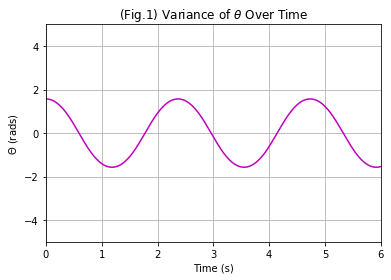

In [7]:
#Plotting the solution for omega and delta to visualize the problem better
plt.figure(1)
plt.title("(Fig.1) Variance of $\\theta$ Over Time")
plt.xlim(0,6)
plt.ylim(-5,5)
plt.xlabel("Time (s)")
plt.ylabel("$\\Theta$ (rads)")
plt.plot(t,sol[:,0],"m") #0 represents all of theta's values on this interval
plt.grid()

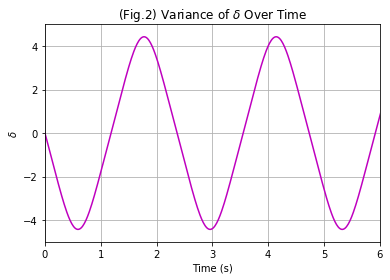

In [8]:
#Plotting the solution for omega and delta to visualize the problem better
plt.figure(2)
plt.title("(Fig.2) Variance of $\\delta$ Over Time")
plt.xlim(0,6)
plt.ylim(-5,5)
plt.xlabel("Time (s)")
plt.ylabel("$\\delta$")
plt.plot(t,sol[:,1],"m") #0 represents all of delta's values on this interval
plt.grid()

In [9]:
#This is to find the time when theta=0, then multiplying by 4 to find 
# the period, since theta starts at its maximum in Figure 1

def period(sol,t): 
    #Defining a function that relies on theta starting at maximum 
    #(due to initial conditions)
    angle = sol[0,0]
    k=0 #Initial conditions
    
    while angle > 0.0:
        k+=1
        angle=sol[k,0] 
        #Adding onto sol until we find the k-value needed for angle
        
    k+=10 #Ensures that the interval contains our wanted value
    
    intercept = interp1d(sol[0:k,0],t[0:k])#sol,t from 0 to k
    
    T=4.0*intercept(0.0) #time at first theta=0 is 1/4 of the period
    return T,intercept

T_num,intercept = period(sol,t)

Since this is not a linear oscillator, we must use a different equation.
From the lecture notes L08, example for a simple pendulum, we can rearrange the formula to solve for $\theta$, where $\theta$ is the amplitude in the equation:

$$\frac{T}{T_o} = \frac{1}{\sqrt{1-(\frac{\theta^2}{8})}}$$

Rearranging and plugging in $T_{predicted}$ and $T_{numerical}$, we have the following:

$$\theta = \frac{1}{\sqrt{8}}\sqrt{1-\frac{(T_{pre})^2}{(T_{num})^2}}$$





In [10]:
#Therefore, theta can be calculated as below:
ratio = T_pre/T_num
angle = (1/np.sqrt(8))*np.sqrt(1-ratio**2)
print(angle)

0.1878265560606988


In [11]:
#Find the new angle
theta_new = [angle,0] #Bounded from solved angle to 0 rads
sol2 = odeint(dw_dt,theta_new,t,args = (omega0,delta))

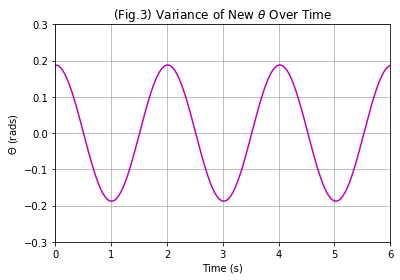

In [12]:
#Plotting the solution for omega and delta to visualize the problem better
plt.figure(3)
plt.title("(Fig.3) Variance of New $\\theta$ Over Time")
plt.xlim(0,6)
plt.ylim(-0.3,0.3)
plt.xlabel("Time (s)")
plt.ylabel("$\\Theta$ (rads)")
plt.plot(t,sol2[:,0],"m")
plt.grid()

In [13]:
#Now, find the period, and therefore the final numerical period of the solution
T_num2,intercept2 = period(sol2,t)
print("The final numerically-determined period is \
%.8f seconds." % (T_num2))

percdiff = ((T_num2-T_pre)/T_num2)*100 
#Percent difference between the two periods
print("The percent difference between the periods \
is %.3f" % (percdiff) , "%")

The final numerically-determined period is 2.01049902 seconds.
The percent difference between the periods is 0.220 %


**Part b) answer**

In [15]:
#Point of this question is to figure out how these 
#sinusoidally-varying functions change with values of delta

#Initial parameters and values
T_list = []
del_list = []
# theta_range, omega0, t, L, and g defined in beginning
theta_range = [np.pi/2,0]
t=np.linspace(0,15,1000)
j = 100
del_step = 1/j
delta1 = 0

while delta < 1:
    
    #Solve to determine delta values
    sol3 = odeint(dw_dt,theta_range,t,args = (omega0,delta1))
    
    #Find the period from that particular delta
    #Then append it to a list
    #And increment delta's value
    T3,intercept3 = period(sol3,t)
    T_list.append(T3)
    del_list.append(delta1)
    delta1 += del_step

IndexError: index 1000 is out of bounds for axis 0 with size 1000

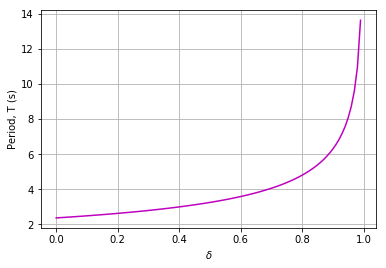

In [16]:
#Graph results
plt.figure(4)
plt.xlabel("$\delta$")
plt.ylabel("Period, T (s)")
plt.plot(del_list,T_list, 'm')
plt.grid()

**Part c) answer**

If $\frac{qE_0}{mg} \equiv \delta = 1$, then the electrical and gravitational forces are equal and therefore balanced, putting the pendulum in static equilibrium.

It can also be seen from Figure 4 that the period approaches infinity as $\delta$ approaches 1, which means that the frequency approaches zero, and thus the pendulum stops moving.